* ORIGINAL DATA

In [1]:
import pandas as pd
data = pd.read_csv("TV Shows - Association Rule Learning.csv")
data.head()

,Cobra Kai,Lupin,12 Monkeys,Sherlock,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sex Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* CONVERTED DATA

In [2]:
import pandas as pd
names = ["feature"+str(i) for i in range(1,33)]
index_feed = ["user"+str(i) for i in range(1,9690)]
dataset = pd.read_csv("/content/drive/MyDrive/Freelance(2023)/Portsmouth university/Assignment/Task3/TV Shows - Association Rule Learning.csv", names = names)
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32
0,Cobra Kai,Lupin,12 Monkeys,Sherlock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here index values are representing the users.

### Setting up dataset suitable for Apriori Algorithm

In [13]:
items=[]
for col in dataset.columns:
  items = items+dataset[col].unique().tolist()
items = list(set(items))[1:]
len(items)

156

In [36]:
import numpy as np
sample_data = np.zeros((dataset.shape[0], len(items)))
# initialise dataframe
user_item = pd.DataFrame(sample_data, columns=items)

# feed data
for user in range(dataset.shape[0]):
  user_data = dataset.iloc[user]
  user_data = list(set(user_data.to_list()))
  if np.nan in user_data:
    user_data.remove(np.nan)
  for col in user_data:
    user_item[col][user] = 1

In [38]:
user_item.head()

,Dr Stone,Daredevil,Hanna,Heros,Inhumans,Supergirl,The Witcher,Ozark,Supernatural,Homeland,...,The White Lotus,Succession,Suits,Loki,Stranger Things,The Walking Dead,Atypical,Spartacus,Iron Fist,Grimm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
import plotly.graph_objs as go

df = user_item

data = [go.Bar(
            x=df.columns,
            y=df.sum(),
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
        )]

layout = go.Layout(
    title='TV Shows Dataset',
    xaxis=dict(
        title='TV Show',
        tickangle=90
    ),
    yaxis=dict(
        title='Number of Occurrences',
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()


In [11]:
#we need to convert our dataset into a format that can be fed into the algorithm. We can use the mlxtend library in Python to implement the Apriori algorithm
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from mlxtend.frequent_patterns import apriori, association_rules

# generate frequent itemsets
frequent_itemsets = apriori(user_item, min_support=0.01, use_colnames=True)
  
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

In [52]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
535,"(Mr. Robot, The Blacklist)",(Ozark),0.021053,0.193705,0.012487,0.593137,3.062067,0.008409,1.981737
530,"(Mr. Robot, Cobra Kai)",(Ozark),0.017750,0.193705,0.010423,0.587209,3.031464,0.006985,1.953278
625,"(Jack Ryan, Atypical)",(Sex Education),0.017441,0.255624,0.010217,0.585799,2.291639,0.005758,1.797135
504,"(Jack Ryan, Ozark)",(Sex Education),0.017337,0.255624,0.010010,0.577381,2.258709,0.005578,1.761340
446,"(Ozark, Berlin Station)",(Sex Education),0.020124,0.255624,0.011558,0.574359,2.246887,0.006414,1.748834
...,...,...,...,...,...,...,...,...,...
628,(Sex Education),"(Jack Ryan, Atypical)",0.255624,0.017441,0.010217,0.039968,2.291639,0.005758,1.023465
478,(Sex Education),"(One Piece, Ozark)",0.255624,0.021775,0.010217,0.039968,1.835484,0.004650,1.018950
430,(Sex Education),"(Daredevil, Ozark)",0.255624,0.026935,0.010217,0.039968,1.483858,0.003331,1.013575
597,(Sex Education),"(Cobra Kai, Atypical)",0.255624,0.021569,0.010114,0.039564,1.834330,0.004600,1.018737


<AxesSubplot:xlabel='support', ylabel='confidence'>

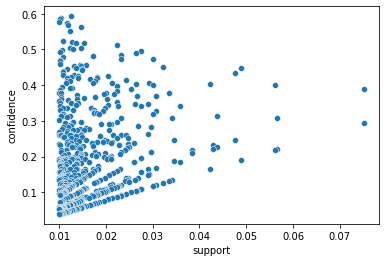

In [61]:
import seaborn as sns

sns.scatterplot(x="support", y="confidence", data=rules)

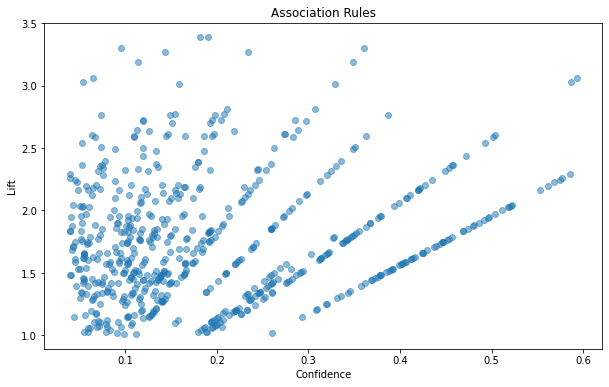

In [66]:
import matplotlib.pyplot as plt

# Plot the rules by confidence and lift
plt.figure(figsize=(10, 6))
plt.scatter(rules["confidence"], rules["lift"], alpha=0.5)
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Association Rules")
plt.show()


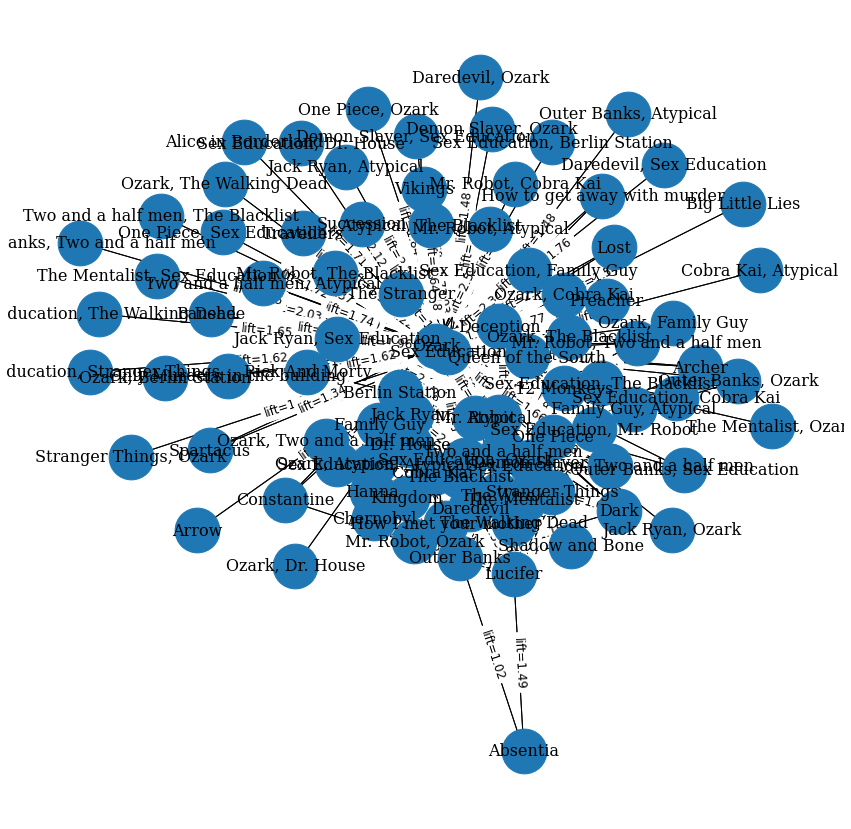

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for index, row in rules.iterrows():
    G.add_edge(', '.join(list(row['antecedents'])), ', '.join(list(row['consequents'])), weight=row['lift'])

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.4)
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=16, font_family="serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"lift={w:.2f}" for u, v, w in G.edges.data('weight')}, label_pos=0.5, font_size=12)
plt.axis("off")
plt.show()
